#Теоретические введение


План урока: всего на 1 час 20 минут
- Рассказываем, что будет на занятии
- Работаем поэтапно с задачей, комментируем каждый шаг, отвечаем на вопросы
- продолжение изучения инструментой pandas будет на семинарах

Почти всё занятие необходимо вести в вс коде, презентация носит больше условный характер.

Исходники:

https://drive.google.com/drive/folders/1pw2wle59tG3nG8aaJnZmMi2BuOs_00Qa?usp=share_link

#Продолжаем изучать pandas (40 мин)

## DataFrame

`DataFrame` это двумерная таблица данных. <br>
Имеет индекс и набор столбцов (возможно, имеющих разные типы). <br>
Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [3]:
import pandas as pd

In [4]:
d={'one':pd.Series([1,2,3], index = ['a','b','c']),
   'two':pd.Series([1,2,3,4], index = ['a','b','c','d'])}
df=pd.DataFrame(d)
df

# строки -- объекты
# стоблцы -- это параметры объектов

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [5]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [6]:
df.columns

Index(['one', 'two'], dtype='object')

Если в качестве индекса указать имя столбца, получится одномерный набор данных.

In [7]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [8]:
df.one

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [9]:
df['one']['c']

3.0


Однако если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [10]:
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [14]:
df['b':'d']['one'::2]

,one,two



Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [15]:
df[1:3]

,one,two
b,2.0,2
c,3.0,3



Логичнее работает атрибут `loc`: первая позиция - всегда индекс строки, а вторая - название столбца.

In [16]:
df.loc['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [17]:
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [18]:
df.loc['b','one']

2.0

In [ ]:
df.loc['a':'b','one']

a    1.0
b    2.0
Name: one, dtype: float64

In [ ]:
df.loc['a':'b',:]

,one,two
a,1.0,1
b,2.0,2


In [ ]:
df.loc[:,'one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

К таблице можно добавлять новые столбцы.

In [19]:
df['three']=df['one']*df['two']
df['flag']=df['two']>2
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


Также можно удалять имеющиеся.

In [20]:
del df['two']
df['foo']=0.
df

,one,three,flag,foo
a,1.0,1.0,False,0.0
b,2.0,4.0,False,0.0
c,3.0,9.0,True,0.0
d,NaN,NaN,True,0.0



Добавим копию столбца `one`, в которую входят только строки до второй.

In [21]:
df['one_tr']=df['one'][:2]
df

,one,three,flag,foo,one_tr
a,1.0,1.0,False,0.0,1.0
b,2.0,4.0,False,0.0,2.0
c,3.0,9.0,True,0.0,NaN
d,NaN,NaN,True,0.0,NaN


In [22]:
df=df.loc[:,['one','one_tr']]
df

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN


Можно объединять таблицы по вертикали и по горизонтали.

In [23]:
df2=pd.DataFrame({'one':{'e':0,'f':1},'one_tr':{'e':2}})
df2

,one,one_tr
e,0,2.0
f,1,NaN


Объединим по столбцам.

In [26]:
pd.concat([df,df2], axis=0)

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN
e,0.0,2.0
f,1.0,NaN


In [27]:
df2=pd.DataFrame({'two':{'a':0,'b':1},'three':{'c':2,'d':3}})
df2

,two,three
a,0.0,NaN
b,1.0,NaN
c,NaN,2.0
d,NaN,3.0


Объединим по строкам.

In [28]:
pd.concat([df,df2],axis=1)

,one,one_tr,two,three
a,1.0,1.0,0.0,NaN
b,2.0,2.0,1.0,NaN
c,3.0,NaN,NaN,2.0
d,NaN,NaN,NaN,3.0



Создадим таблицу из массива случайных чисел.

In [30]:
import numpy as np

In [31]:
df=pd.DataFrame(np.random.randn(10,4),
                columns=['A','B','C','D'])
df

,A,B,C,D
0,0.842444,-0.086966,1.066125,-0.299693
1,0.460979,-0.277370,0.040219,-0.909770
2,0.135036,0.040051,0.187720,-0.068649
3,0.611454,0.343661,-0.338658,0.555691
4,0.045086,0.619425,-0.110672,-0.417633
5,0.624329,0.276175,0.099501,-1.106303
6,-0.665160,-0.022252,0.002672,0.611955
7,-0.746039,1.990270,-2.144486,1.289535
8,-0.197916,-0.637868,-0.512758,-0.484202
9,0.499930,1.213653,-0.086969,-0.313271


In [ ]:
df2=pd.DataFrame(np.random.randn(7,3),columns=['A','B','C'])
df+df2

,A,B,C,D
0,0.652268,-1.933097,2.244354,NaN
1,2.251482,-2.156475,-0.935031,NaN
2,-0.847216,0.459933,1.452732,NaN
3,-1.872395,0.870940,-0.267882,NaN
4,-0.551765,2.339055,-1.174038,NaN
5,-1.306939,-1.528331,-1.062586,NaN
6,0.439756,0.379817,1.222286,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


Прошу заметить, что объекты **не изменяются пока мы их не перезапишем в явном виде**, например: `df = df+df2`

In [40]:
df.drop('A', axis=1, inplace=True)

In [42]:
df = df.drop('C', axis=1)

In [43]:
df

,B,D
0,-0.086966,-0.299693
1,-0.277370,-0.909770
2,0.040051,-0.068649
3,0.343661,0.555691
4,0.619425,-0.417633
5,0.276175,-1.106303
6,-0.022252,0.611955
7,1.990270,1.289535
8,-0.637868,-0.484202
9,1.213653,-0.313271


In [45]:
[1, 2, 3] * 2

[1, 2, 3, 1, 2, 3]

In [44]:
2*df+3

,B,D
0,2.826067,2.400613
1,2.445261,1.180460
2,3.080101,2.862702
3,3.687322,4.111382
4,4.238851,2.164733
5,3.552351,0.787393
6,2.955496,4.223911
7,6.980541,5.579070
8,1.724263,2.031595
9,5.427306,2.373458


In [46]:
df.describe()

,B,D
count,10.000000,10.000000
mean,0.345878,-0.114234
std,0.768068,0.735513
min,-0.637868,-1.106303
25%,-0.070788,-0.467560
50%,0.158113,-0.306482
75%,0.550484,0.399606
max,1.990270,1.289535


Можем отсортировать по значениям в колонке.

In [48]:
df.sort_values(by='B')

,B,D
8,-0.637868,-0.484202
1,-0.277370,-0.909770
0,-0.086966,-0.299693
6,-0.022252,0.611955
2,0.040051,-0.068649
5,0.276175,-1.106303
3,0.343661,0.555691
4,0.619425,-0.417633
9,1.213653,-0.313271
7,1.990270,1.289535


Атрибут iloc подобен loc: первый индекс - индекс строки, второй - индекс столбца. Это целые числа, конец диапазона на включается (как обычно в питоне).

In [49]:
df.iloc[2]

B    0.040051
D   -0.068649
Name: 2, dtype: float64

In [50]:
df.iloc[1:3, 0:2]

,B,D
1,-0.277370,-0.909770
2,0.040051,-0.068649


In [51]:
df.iloc[1:3,0:2]

,B,D
1,-0.277370,-0.909770
2,0.040051,-0.068649


Посчитаем кумулятивные суммы.

In [52]:
cs=df.cumsum()
cs

,B,D
0,-0.086966,-0.299693
1,-0.364336,-1.209463
2,-0.324285,-1.278112
3,0.019376,-0.722421
4,0.638801,-1.140055
5,0.914976,-2.246358
6,0.892724,-1.634403
7,2.882995,-0.344868
8,2.245126,-0.829070
9,3.458779,-1.142341


И построим график.

In [57]:
from matplotlib import pyplot as plt

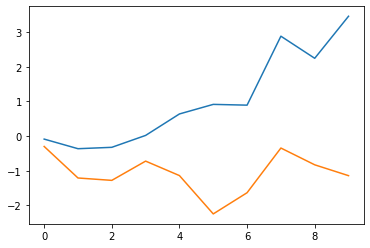

In [58]:
plt.plot(cs)

## Чтение файлов

Так как основная форма обмена информации это таблицы, то нужно научиться загружать их и записывать.<br>
В `Pandas` есть удобные методы для чтения`.read_csv()`/`.read_excel()`/`.read_table()` и `.to_csv()`/`.to_excel()`

Прочитаем файл и вглянем на его.

**Если необходимо, пути можно менять.**

In [61]:
!pwd

"pwd" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [63]:
data = pd.read_csv('data/bank.csv',sep=';')

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [65]:
data = pd.read_csv('data/bank.xlsx',sep=';')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 15-16: invalid continuation byte

In [68]:
data = pd.read_excel('data/bikes_rent.xls')

In [70]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt
0,1,0,1,0,6,0,2,985
1,1,0,1,0,0,0,2,801
2,1,0,1,0,1,1,1,1349
3,1,0,1,0,2,1,1,1562
4,1,0,1,0,3,1,1,1600
...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,2114
727,1,1,12,0,5,1,2,3095
728,1,1,12,0,6,0,2,1341
729,1,1,12,0,0,0,1,1796


Создами колонку с кумулятивной суммой поездок.

In [ ]:
data['cum_sum'] = data['cnt'].cumsum()

In [ ]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt,cum_sum
0,1,0,1,0,6,0,2,985,985
1,1,0,1,0,0,0,2,801,1786
2,1,0,1,0,1,1,1,1349,3135
3,1,0,1,0,2,1,1,1562,4697
4,1,0,1,0,3,1,1,1600,6297


Перезапишем наш файл.

In [ ]:
data.to_csv('../data/bikes_rent.csv', index=False)

С запись в экселевский формат немного длиннее. Сначало нам нужно создать объект, который будет записывать файл и в него передать нашу таблицу.

In [ ]:
writer = pd.ExcelWriter('bikes_rent.xlsx')
data.to_excel(writer, sheet_name ='bikes_rent_sheet')

#Продолжаем практиковатья


**По возможности ребята должны сами пытаться решать, с подсказками от преподавателя.**

Стараемся дать ребятам время на подумать, они могут использовать литературу для работы с библиотеками.Разбираем каждую задачу с ребятами. Можем придумывать задачи посложнее и давать ребятам сделать самостоятельно.

**Не забываем добавить файл в директорию с проектом!**

#Задание №1

Напишите программу Pandas для импорта данных в формате Excel в кадр данных Pandas.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('Table1.xlsx')
print(df.head)

<bound method NDFrame.head of                      Группа  % Посещаемость    % ДЗ  Успещность ДЗ  Взвешенное
0   2год_инф_гр1_2021.09.09          0.9990  0.8382           71.9      0.8988
1   2год_инф_гр2_2021.09.15          0.8815  0.6486           72.6      0.7779
2   2год_инф_гр5_2021.10.11          0.9551  0.7057           71.6      0.8320
3   2год_мат_гр1_2021.09.07          0.9995  0.9379           75.2      0.9377
4   2год_мат_гр2_2021.09.16          0.9194  0.9559           69.8      0.8946
..                      ...             ...     ...            ...         ...
80   год_мат_гр1_2021.09.06          0.9974  0.9714           78.3      0.9530
81  год_мат_гр12_2021.09.14          0.9873  0.8317           71.4      0.8898
82  год_мат_гр17_2021.09.27          0.9450  0.7059           73.1      0.8296
83  год_рус_гр16_2021.09.23          0.9967  0.7846           73.5      0.8824
84   год_физ_гр3_2021.10.03          0.8595  0.6500           66.0      0.7564

[85 rows x 5 columns]

#Задание №2

Напишите программу Pandas, чтобы получить типы данных для данных полей Excel.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('Table1.xlsx')
df.dtypes

Группа             object
% Посещаемость    float64
% ДЗ              float64
Успещность ДЗ     float64
Взвешенное        float64
dtype: object

#Задание №3

Напишите программу Pandas для чтения определенных столбцов из данного файла Excel.

In [ ]:
import pandas as pd
import numpy as np
cols = [1, 2, 4]
df = pd.read_excel('Table1.xlsx', usecols=cols)
print(df)

,% Посещаемость,% ДЗ,Взвешенное
0,0.9990,0.8382,0.8988
1,0.8815,0.6486,0.7779
2,0.9551,0.7057,0.8320
3,0.9995,0.9379,0.9377
4,0.9194,0.9559,0.8946
...,...,...,...
80,0.9974,0.9714,0.9530
81,0.9873,0.8317,0.8898
82,0.9450,0.7059,0.8296
83,0.9967,0.7846,0.8824


#Задание №4

Напишите программу Pandas, чтобы найти сумму, среднее, максимальное и минимальное значение столбца «Посещение» файла Table1.xlsx.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('Table1.xlsx')

print("Sum: ",df["% Посещаемость"].sum())
print("Mean: ",df["% Посещаемость"].mean())
print("Maximum: ",df["% Посещаемость"].max())
print("Minimum: ",df["% Посещаемость"].min())

Sum:  81.1471
Mean:  0.9546717647058823
Maximum:  1.0
Minimum:  0.8348


#Задание №5

Напишите программу Pandas, чтобы вставить столбец в шестую позицию указанного листа Excel и заполнить его значениями NaN


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('Table1.xlsx')
df.insert(3, "NEW", np.nan)

print(df.head)

<bound method NDFrame.head of                      Группа  % Посещаемость    % ДЗ  NEW  Успещность ДЗ  \
0   2год_инф_гр1_2021.09.09          0.9990  0.8382  NaN           71.9   
1   2год_инф_гр2_2021.09.15          0.8815  0.6486  NaN           72.6   
2   2год_инф_гр5_2021.10.11          0.9551  0.7057  NaN           71.6   
3   2год_мат_гр1_2021.09.07          0.9995  0.9379  NaN           75.2   
4   2год_мат_гр2_2021.09.16          0.9194  0.9559  NaN           69.8   
..                      ...             ...     ...  ...            ...   
80   год_мат_гр1_2021.09.06          0.9974  0.9714  NaN           78.3   
81  год_мат_гр12_2021.09.14          0.9873  0.8317  NaN           71.4   
82  год_мат_гр17_2021.09.27          0.9450  0.7059  NaN           73.1   
83  год_рус_гр16_2021.09.23          0.9967  0.7846  NaN           73.5   
84   год_физ_гр3_2021.10.03          0.8595  0.6500  NaN           66.0   

    Взвешенное  
0       0.8988  
1       0.7779  
2       0.8320  
3

#Задание №6

Напишите программу Pandas для добавления суммирования в строку данного файла Excel.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('Table1.xlsx')
sum_row = df[["Успещность ДЗ", "Взвешенное"]].sum()
df_sum = pd.DataFrame(data=sum_row).T
df_sum = df_sum.reindex(columns=df.columns)

print(df_sum)

,Группа,% Посещаемость,% ДЗ,Успещность ДЗ,Взвешенное
0,NaN,NaN,NaN,6088.5,72.7745


#Задание №7

Напишите программу Pandas для импорта данных Excel (Table1.xlsx) в кадр данных Pandas и отобразите последние десять строк.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('Table1.xlsx')
df.tail(n=10)

,Группа,% Посещаемость,% ДЗ,Успещность ДЗ,Взвешенное
75,год_инт_инф_гр1_2021.11.05,0.9667,0.7692,74.4,0.8637
76,год_инт_мат_гр1_2021.11.03,0.9800,0.9000,74.4,0.9140
77,год_инт_мат_гр2_2021.11.11,0.9500,0.8500,84.0,0.8983
78,год_инт_общ_гр1_2021.11.21,0.9500,0.8000,16.5,0.7692
79,год_инт_рус_гр1_2021.11.04,0.9621,0.7686,81.0,0.8723
80,год_мат_гр1_2021.09.06,0.9974,0.9714,78.3,0.9530
81,год_мат_гр12_2021.09.14,0.9873,0.8317,71.4,0.8898
82,год_мат_гр17_2021.09.27,0.9450,0.7059,73.1,0.8296
83,год_рус_гр16_2021.09.23,0.9967,0.7846,73.5,0.8824
84,год_физ_гр3_2021.10.03,0.8595,0.6500,66.0,0.7564


#Задание №8

Напишите программу Pandas для импорта данных в формате Excel (Table1.xlsx) в фрейм данных и найдите конкретный идентификатор Группа.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('Table1.xlsx')
df[df["Группа"] == "год_мат_гр17_2021.09.27"].head()

,Группа,% Посещаемость,% ДЗ,Успещность ДЗ,Взвешенное
82,год_мат_гр17_2021.09.27,0.945,0.7059,73.1,0.8296


#Задание №9

Напишите программу Pandas для импорта данных Excel (Table1.xlsx) в кадр данных и найдите группы, где «взвешенное» > 0.85.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('Table1.xlsx')
df[df["Взвешенное"] > 0.85].head()

,Группа,% Посещаемость,% ДЗ,Успещность ДЗ,Взвешенное
0,2год_инф_гр1_2021.09.09,0.9990,0.8382,71.9,0.8988
3,2год_мат_гр1_2021.09.07,0.9995,0.9379,75.2,0.9377
4,2год_мат_гр2_2021.09.16,0.9194,0.9559,69.8,0.8946
5,2год_мат_гр3_2021.09.21,0.9995,0.7944,77.9,0.8944
6,2год_мат_гр5_2021.10.14,0.9594,0.8761,78.5,0.9026


#Задание №10

Напишите программу Pandas для импорта данных в формате Excel (Table1.xlsx) в фрейм данных Pandas и найдите список указанных групп по имени

In [ ]:
#год_инт_рус_гр1_2021.11.04
#2год_мат_гр3_2021.09.21
#год_рус_гр16_2021.09.23

import pandas as pd
import numpy as np
df = pd.read_excel('Table1.xlsx')
df.query('Группа == ["год_инт_рус_гр1_2021.11.04", "2год_мат_гр3_2021.09.21", "год_рус_гр16_2021.09.23"]').head()

,Группа,% Посещаемость,% ДЗ,Успещность ДЗ,Взвешенное
5,2год_мат_гр3_2021.09.21,0.9995,0.7944,77.9,0.8944
79,год_инт_рус_гр1_2021.11.04,0.9621,0.7686,81.0,0.8723
83,год_рус_гр16_2021.09.23,0.9967,0.7846,73.5,0.8824


#Задание №11

Напишите программу Pandas для импорта данных в формате Excel (Table2.xlsx) в кадр данных Pandas и найдите список учеников, которые относятся к информатике.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('Table2.xlsx')
df[df['предмет'] =='ИНФ']

,Unique практикумы,Почта,ФИ ученика,Курс,Формат,предмет,Посещаемость \nзанятий 16.01,Посещаемость \nзанятий\n28.12,Посещаемость \nпрактикумов\n16.01,Посещаемость \nпрактикумов\n28.12,...,ДЗ практикумов\n16.01,ДЗ практикумов\n28.12,Правильность ДЗ занятий\n16.01,Правильность ДЗ занятий\n28.12,Правильность ДЗ практикумов\n16.01,Правильность ДЗ практикумов\n28.12,Взвешенное\n16.01,Взвешенное\n28.12,Кагорта\n16.01,Кагорта\n28.12
0,annakuligina2007@mail.ru 2год_инф_гр1_2022.09.12,annakuligina2007@mail.ru,Анна Кулигина,2год_инф_гр1_2022.09.12,10 класс,ИНФ,0.6667,0.625,0.0000,0.0000,...,0.000,0.0000,0.8350,0.8350,NaN,NaN,NaN,0.2675,0-49,0-49
1,das13hab123ykova2201@gmail.com 2год_инф_гр1_20...,dashabykova2201@gmail.com,Дарья Быкова,2год_инф_гр1_2022.09.12,10 класс,ИНФ,0.0000,0.000,0.0000,0.0000,...,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,0.0000,0-49,0-49
2,egorurudenko@yandex.ru 2год_инф_гр1_2022.09.12,egorurudenko@yandex.ru,Егор Руденко,2год_инф_гр1_2022.09.12,10 класс,ИНФ,0.5556,0.375,0.7143,0.7143,...,0.500,0.6667,0.7567,0.7567,0.8500,0.8500,0.5902,0.5798,60-69,50-59
3,irisha0021944@gmail.com 2год_инф_гр1_2022.09.12,irisha0021944@gmail.com,Ирина Ступко,2год_инф_гр1_2022.09.12,10 класс,ИНФ,1.0000,0.875,1.0000,1.0000,...,0.500,0.5000,0.3150,0.3020,0.2575,0.3433,0.7422,0.7100,70-79,70-79
4,kirillovegor69@gmail.com 2год_инф_гр1_2022.09.12,kirillovegor69@gmail.com,Егор Кириллов,2год_инф_гр1_2022.09.12,10 класс,ИНФ,0.8889,0.750,0.7143,0.7143,...,0.375,0.5000,0.4057,0.3560,0.6100,0.6100,0.6776,0.6341,60-69,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,semennadytkin2@gmail.com 2год_инф_гр7_2022.09.12,semennadytkin2@gmail.com,Семен Надуткин,2год_инф_гр7_2022.09.12,10 класс,ИНФ,0.1111,0.000,0.6667,0.6667,...,0.125,0.0000,0.6000,0.6000,0.8300,NaN,0.3530,0.2375,0-49,0-49
73,yanakasaeva2006@gmail.com 2год_инф_гр7_2022.09.12,yanakasaeva2006@gmail.com,Яна Касаева,2год_инф_гр7_2022.09.12,10 класс,ИНФ,0.1111,0.125,0.6667,0.6667,...,0.375,0.7500,0.9150,0.9150,1.0000,1.0000,0.4536,0.5242,0-49,50-59
74,babanovniki2@mail.ru 2год_инф_гр8_2022.09.12,babanovniki2@mail.ru,Никита Бабанов,2год_инф_гр8_2022.09.12,10 класс,ИНФ,1.0000,NaN,0.0000,NaN,...,0.000,NaN,0.8600,NaN,NaN,NaN,NaN,NaN,0-49,NaN
75,mirzamonz@mail.ru 2год_инф_гр8_2022.09.12,mirzamonz@mail.ru,Мирзамон Замонов,2год_инф_гр8_2022.09.12,10 класс,ИНФ,0.2222,0.250,1.0000,NaN,...,0.000,NaN,0.5550,0.7100,NaN,NaN,NaN,0.1425,0-49,0-49


#Задание №12

Напишите программу Pandas для импорта данных Excel (Table2.xlsx) в кадр данных Pandas и сортировки по нескольким заданным столбцам.


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('Table2.xlsx')
result = df.sort_values(by=['ФИ ученика','Кагорта 28.12'],ascending=[0,1])
print(result)

                                    Unique практикумы  \
9    shustriyshustr@gmail.com 2год_инф_гр1_2022.09.12   
83   shustriyshustr@gmail.com 2год_мат_гр1_2022.09.13   
73  yanakasaeva2006@gmail.com 2год_инф_гр7_2022.09.12   
20        yulek2006@gmail.com 2год_инф_гр2_2022.09.12   
97        yulek2006@gmail.com 2год_мат_гр2_2022.09.13   
..                                                ...   
15      revalex2612@gmail.com 2год_инф_гр2_2022.09.12   
93      revalex2612@gmail.com 2год_мат_гр2_2022.09.13   
56  bogdan.bogdan.type.sukhanov@mail.ru 2год_инф_г...   
65  bogdan.bogdan.type.sukhanov@mail.ru 2год_инф_г...   
60             mz_@rambler.ru 2год_инф_гр6_2022.09.12   

                                  Почта             ФИ ученика  \
9              shustriyshustr@gmail.com      Ярослав Алимбочка   
83             shustriyshustr@gmail.com      Ярослав Алимбочка   
73            yanakasaeva2006@gmail.com            Яна Касаева   
20                  yulek2006@gmail.com          Юл

#Задание №13

Напишите программу Pandas, чтобы импортировать три таблицы данных из данных Excel (Table2.xlsx)  и (Table1.xlsx) в один фрейм данных и экспортировать результат в новый файл Excel.

In [ ]:
import pandas as pd
import numpy as np

df1 = pd.read_excel('Table1.xlsx',sheet_name=0)
df2 = pd.read_excel('Table2.xlsx',sheet_name=0)

df = pd.concat([df1, df2])

df.to_excel('output.xlsx', index=False)